In [1]:
# importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [4]:
# reading the dataset
data=pd.read_csv('C:/Users/prane/Downloads/Mall_Customers (1).csv')

In [5]:
# displaying first 5 rows
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
# (no. of rows and no. of columns)
data.shape

(200, 5)

In [7]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [8]:
# finding any null values in data
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [10]:
# Finding the number of males and females in the data
data.Gender.value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

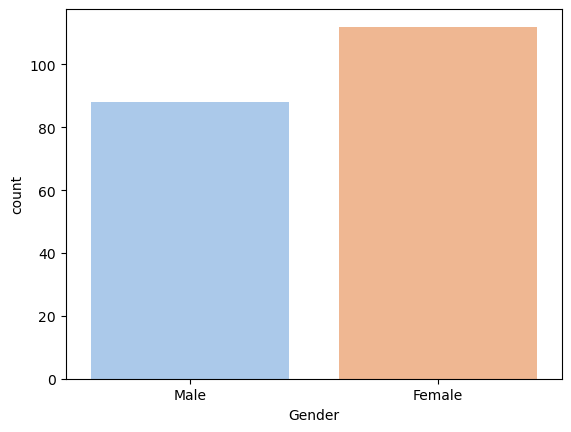

In [11]:
# Visualising the number of males and females in the data
sns.countplot(x="Gender",data=data,palette="pastel")
plt.show()

In [12]:
# Computing minimum and maximum age of customers
print(min(data.Age))
print(max(data.Age))

18
70


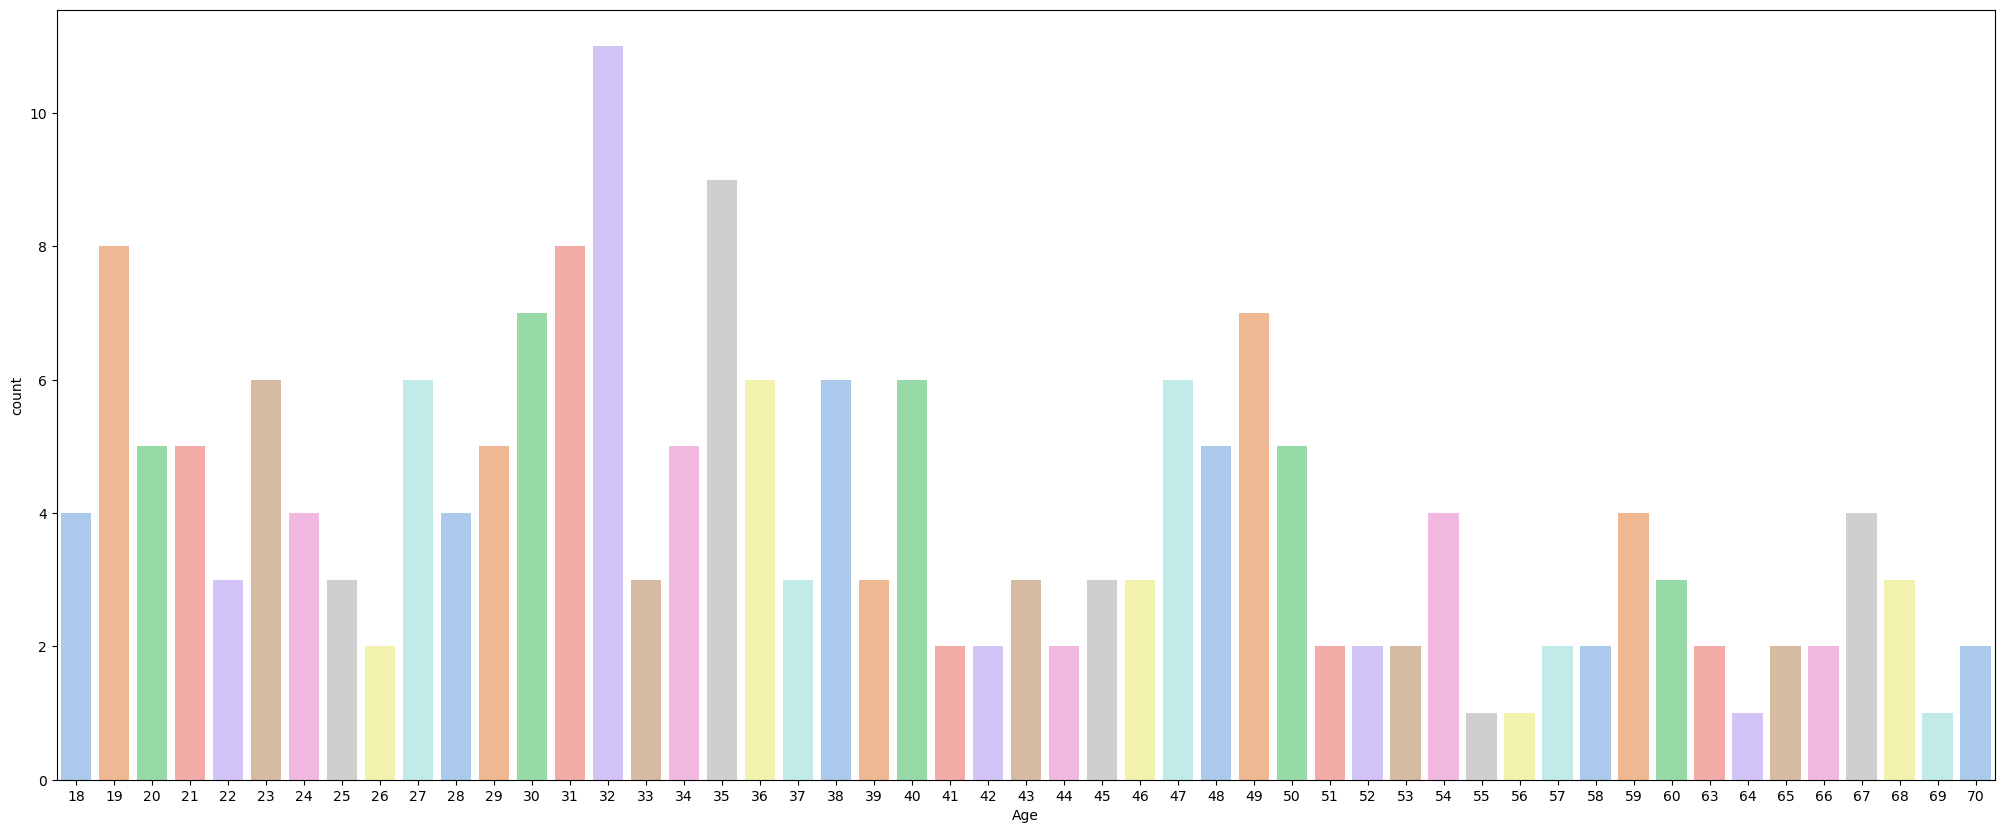

In [13]:
# Visualising the age distribution of customers
plt.figure(figsize=(25,10))
sns.countplot(x="Age",data=data,palette="pastel")
plt.show()

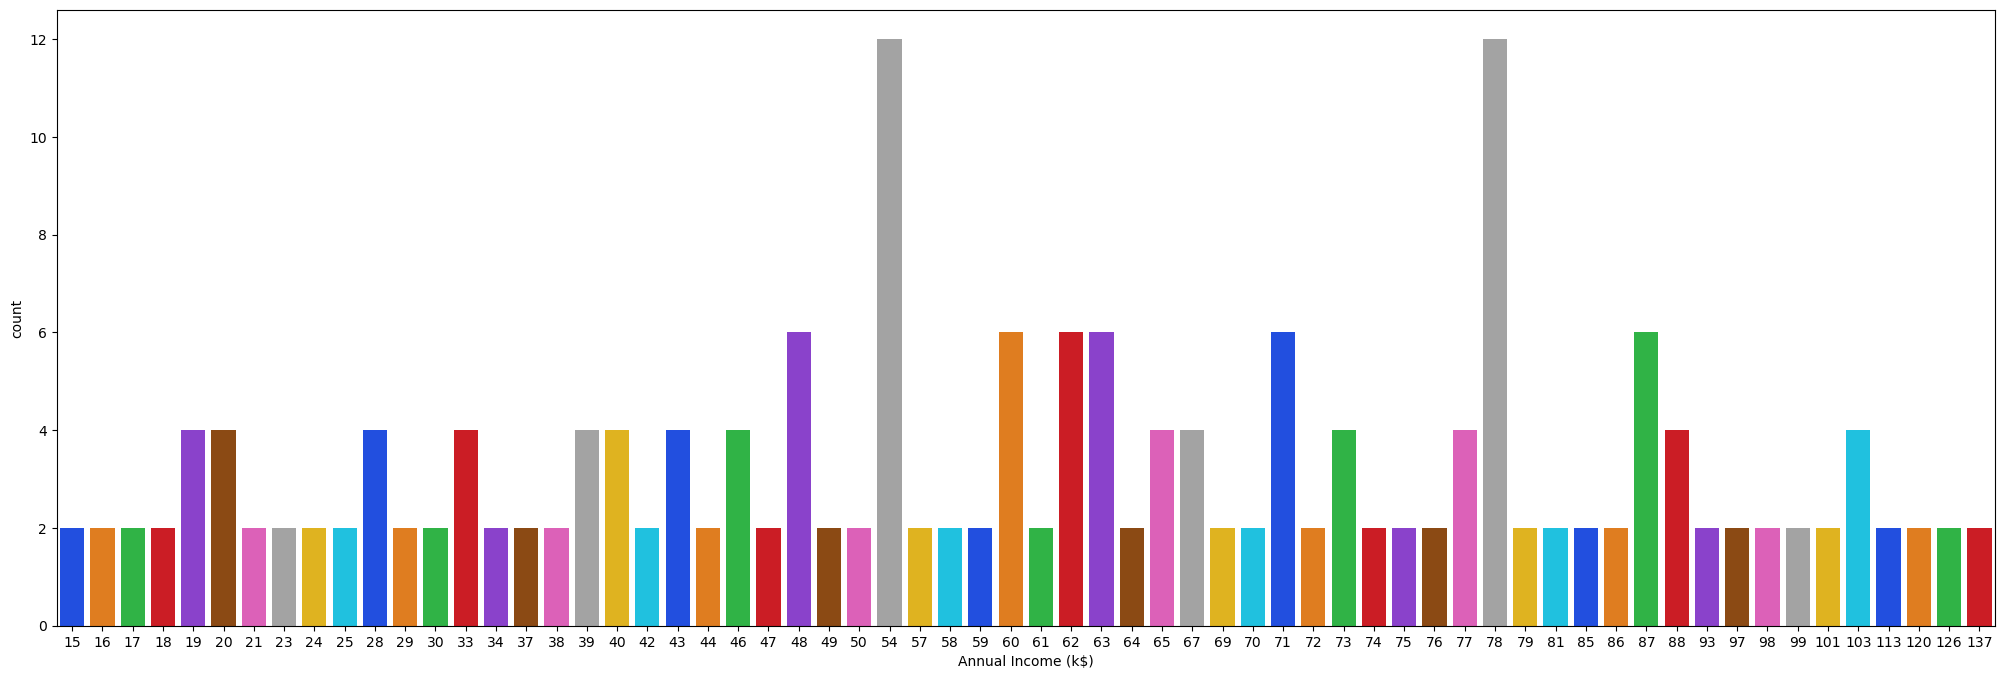

In [14]:
# Visualising the income distribution of customers
plt.figure(figsize=(25,8))
sns.countplot(x="Annual Income (k$)",data=data,palette="bright")
plt.show()

Customers with annual income of 54k and 78k make for the largest number of customers

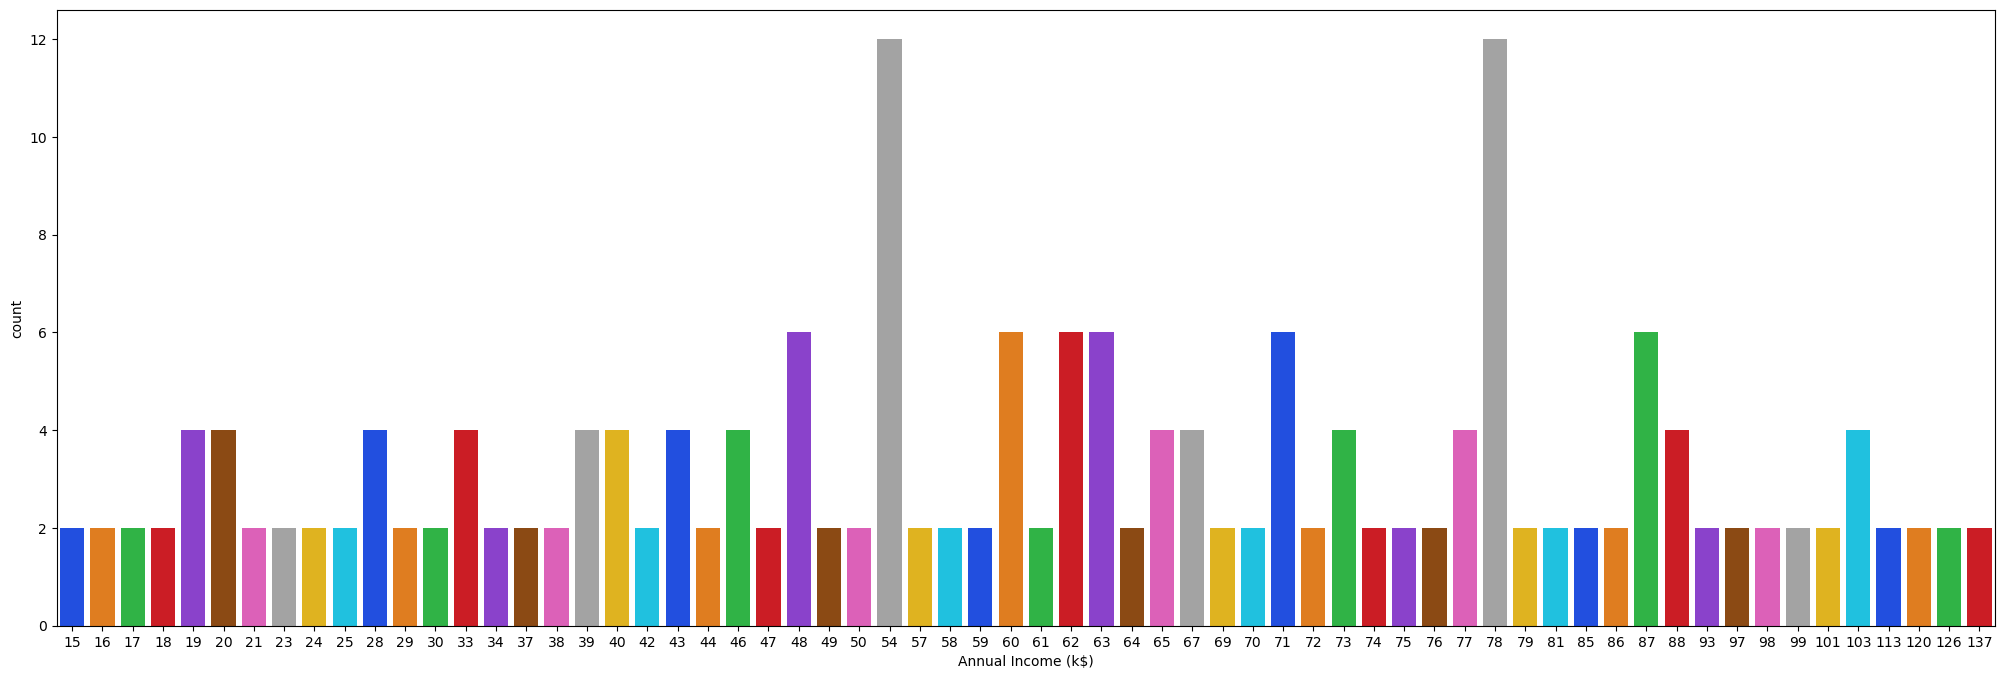

In [15]:
# Visualising the income distribution of customers
plt.figure(figsize=(25,8))
sns.countplot(x="Annual Income (k$)",data=data,palette="bright")
plt.show()

The maximum spending score is 42

# K-Means Clustering

Making clusters based on annual income and spending score

In [16]:
# Taking annual income and spending score in x to make clusters
x=data.iloc[:,[3,4]]

In [17]:
# displaying first 5 rows of x
x.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


Elbow method

In [21]:
# Using elbow method to find the optimal number of clusters.
from sklearn.cluster import KMeans

The sum of squares is a statistical measure of deviation from the mean. It is also known as variation.

In [22]:
# WCSS is Within Cluster Sum of Squares
wcss=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,init="k-means++",max_iter=300,n_init=10,random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

C:\Users\prane\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


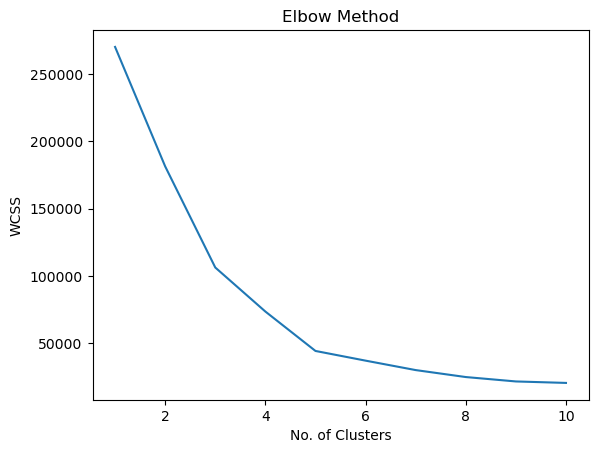

In [23]:
#visualizing elbow method
plt.plot(range(1,11),wcss)
plt.xlabel("No. of Clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()

From the above graph we can say that the number of optimal clusters=5

Applying K-means:

In [24]:
# creating object kmeans of class KMeans()
kmeans=KMeans(n_clusters=5,init="k-means++",max_iter=300,n_init=10,random_state=0)

In [25]:
y_kmeans=kmeans.fit_predict(x)
y_kmeans
# it tells which data point belongs to which cluster (0,1,2,3,4)

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [26]:
y_kmeans.astype

<function ndarray.astype>

In [27]:
# converting x into ndarray to avoid errors
x=np.array(x)

In [28]:
x.astype

<function ndarray.astype>

Visualizing the cluster:

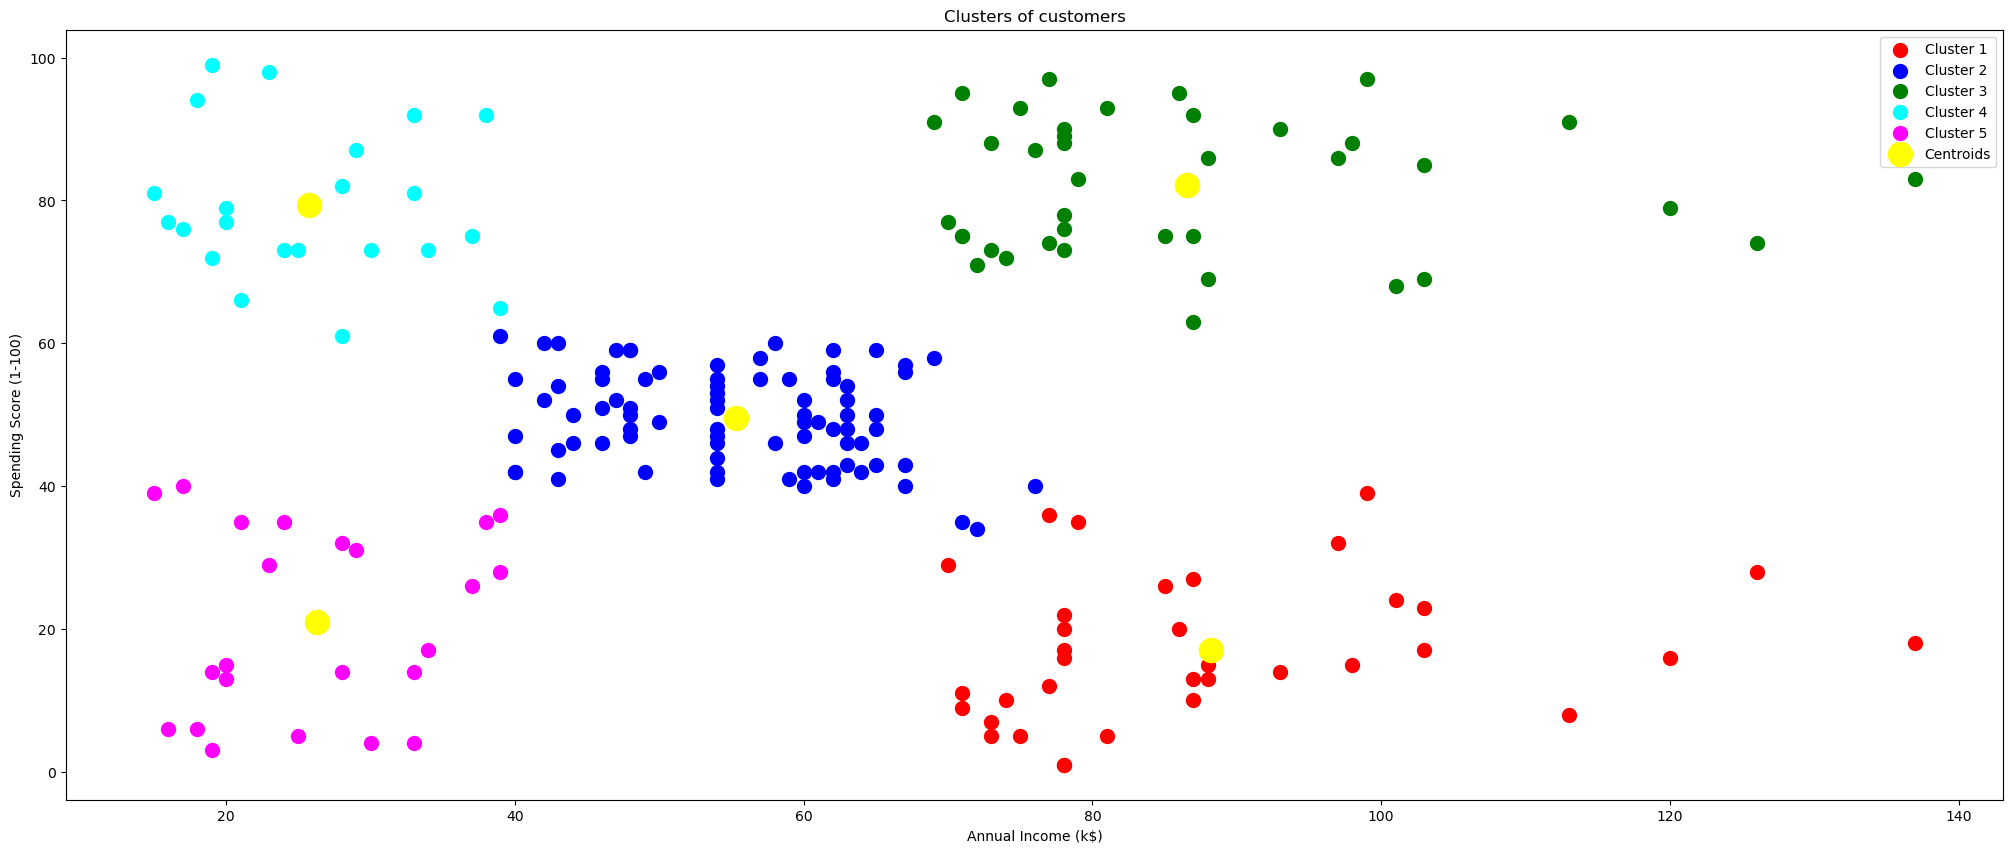

In [29]:
fig = plt.figure(figsize=(25, 10))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(x[y_kmeans == 4, 0], x[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()


Cluster 1 contains customers with high annual income but low spending score.

Cluster 2 contains customers with average annual income and average spending score.

Cluster 3 contains customers with high annual income and high spending score.

Cluster 4 contains customers with low annual income but high spending score.

Cluster 5 contains customers with low annual income and low spending score.